In [17]:
import pandas as pd
import numpy as np

In [2]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
 index_col=0, parse_dates=True).dropna()

In [3]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,284.270000,157.380,59.41,1789.21,229.91,321.23,3223.38,12.67,1.1087,1498.8100,28.66,141.27
2019-12-26,289.910000,158.670,59.82,1868.77,231.21,322.94,3239.91,12.65,1.1096,1511.2979,29.08,142.38
2019-12-27,289.800000,158.960,60.08,1869.80,230.66,322.86,3240.02,13.43,1.1175,1510.4167,28.87,142.33


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [6]:
data = pd.DataFrame(raw['EUR='])

In [7]:
data

,EUR=
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412
...,...
2019-12-24,1.1087
2019-12-26,1.1096
2019-12-27,1.1175


In [8]:
data.rename(columns={'EUR=':'price'}, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [11]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

data

,price,SMA1,SMA2
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN
...,...,...,...
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428


In [14]:
%matplotlib inline
from pylab import mpl, plt
# plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

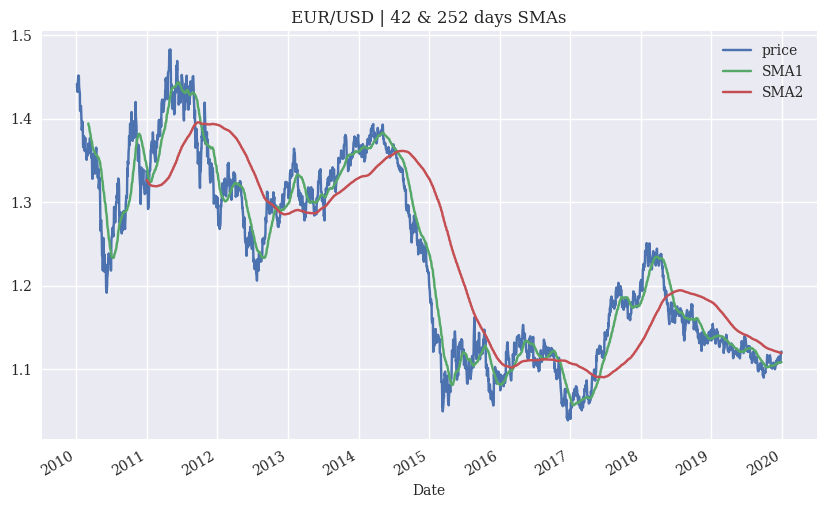

In [15]:
data.plot(title='EUR/USD | 42 & 252 days SMAs',figsize=(10, 6));

In [18]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [20]:
data.dropna(inplace=True)

<Axes: title={'center': 'Market Positioning'}, xlabel='Date'>

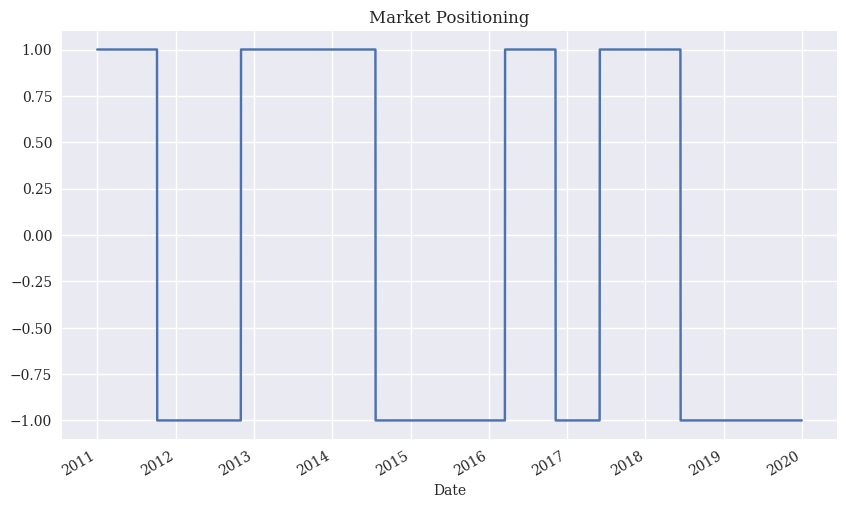

In [22]:
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6))

In [23]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<Axes: >

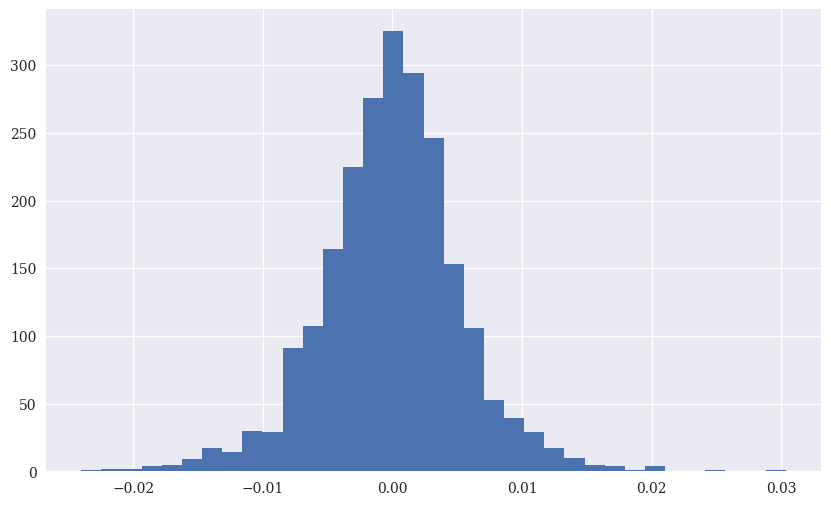

In [25]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [26]:
 data['strategy'] = data['position'].shift(1) * data['returns']

In [27]:
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [29]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<Axes: xlabel='Date'>

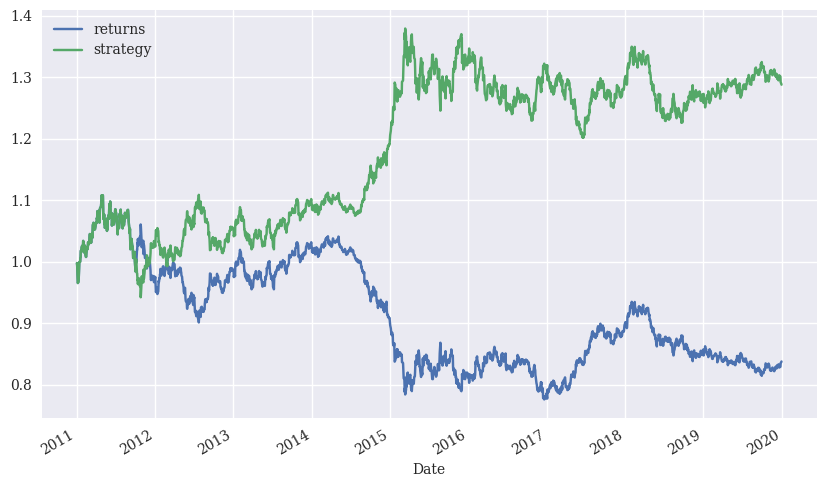

In [30]:
 data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [32]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [33]:
data['cummax'] = data['cumret'].cummax()

<Axes: xlabel='Date'>

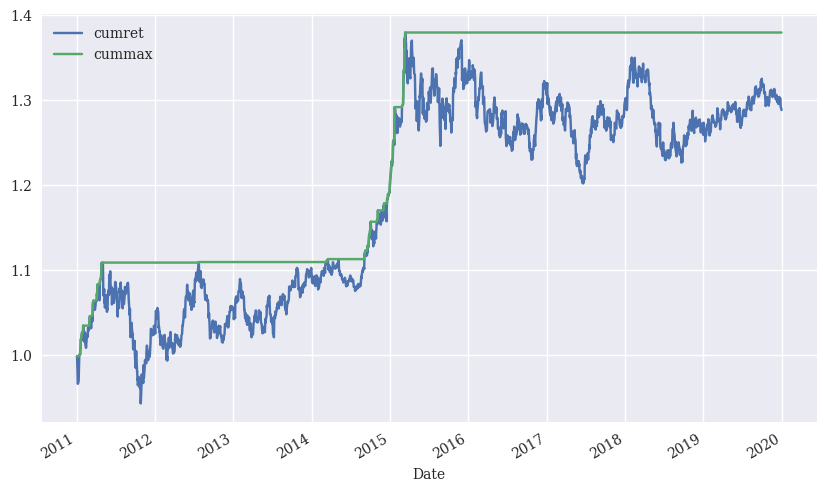

In [34]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [37]:
drawdown = data['cummax'] - data['cumret']
drawdown.max()

0.17779367070195895